## Comandos de configuração do ambiente Jupiter - IDE[VS Code]

#### Linux (Ubuntu 24.04)
**criando o ambiente virtual:**

`python3 -m venv venv`

**baixando dependências do projeto:**

`pip install -r requirements.txt`

# Importando Pacotes

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.ion()

# Acessando Base de Dados

Os dados apresentados foram retirados do site https://terrabrasilis.dpi.inpe.br/ e a base pode ser obtida através do link abaixo:

`https://terrabrasilis.dpi.inpe.br/queimadas/bdqueimadas/#exportar-dados`

**Sobre a base:**
A base contém dados referente aos primeiros 05 dias do mês setembro contendo todos os estados brasileiros. O objetivo é transformar as informações sobre focos de fogo em um dado de valor, priorizando fidelidade e clareza, permitindo assim uma análise criteriosa e tomadas de deciões mais acertivas. (Base possui 60MB aproximadamente)

</br>

#
**DADOS:**
- Data e Hora
- Satélite que registrou o foco
- País (No nosso caso todos os dados são referentes ao Brasil)
- Estado
- Município
- Bioma
- Dias sem chuva
- Precipitação
- Risco de fogo
- Latitude
- Longitude
- FRP (“Fire Radiative Power”, mede a energia radiante liberada por unidade de tempo, associada à taxa de queima da vegetação, em MW - megawatts)

In [63]:
df = pd.read_csv('./queimadas_dataset.csv')

# Higienizando e Organizando os dados

In [64]:
# Mudando para datetype
df['DataHora'] = pd.to_datetime(df['DataHora'])

# Eliminando linhas onde há dados NaN, presentes em alguma das colunas definidas
df = df.dropna(subset=['Precipitacao', 'RiscoFogo', 'FRP'])

# Ordenando o dataframe por estado e municipio
df_ordenado_estado = df.sort_values(by=['Estado', 'Municipio'])
print(df_ordenado_estado)

                  DataHora Satelite    Pais     Estado   Municipio     Bioma  \
19086  2024-09-02 04:57:00  NOAA-20  Brasil       ACRE  ACRELÂNDIA  Amazônia   
19120  2024-09-02 04:57:00  NOAA-20  Brasil       ACRE  ACRELÂNDIA  Amazônia   
48788  2024-09-02 05:50:00  NOAA-21  Brasil       ACRE  ACRELÂNDIA  Amazônia   
48789  2024-09-02 05:50:00  NOAA-21  Brasil       ACRE  ACRELÂNDIA  Amazônia   
48790  2024-09-02 05:50:00  NOAA-21  Brasil       ACRE  ACRELÂNDIA  Amazônia   
...                    ...      ...     ...        ...         ...       ...   
345563 2024-09-01 18:45:43  GOES-16  Brasil  TOCANTINS     XAMBIOÁ  Amazônia   
345564 2024-09-01 18:45:43  GOES-16  Brasil  TOCANTINS     XAMBIOÁ  Amazônia   
356735 2024-09-02 05:15:43  GOES-16  Brasil  TOCANTINS     XAMBIOÁ  Amazônia   
357260 2024-09-02 06:05:43  GOES-16  Brasil  TOCANTINS     XAMBIOÁ  Amazônia   
357261 2024-09-02 06:05:43  GOES-16  Brasil  TOCANTINS     XAMBIOÁ  Amazônia   

        DiaSemChuva  Precipitacao  Risc

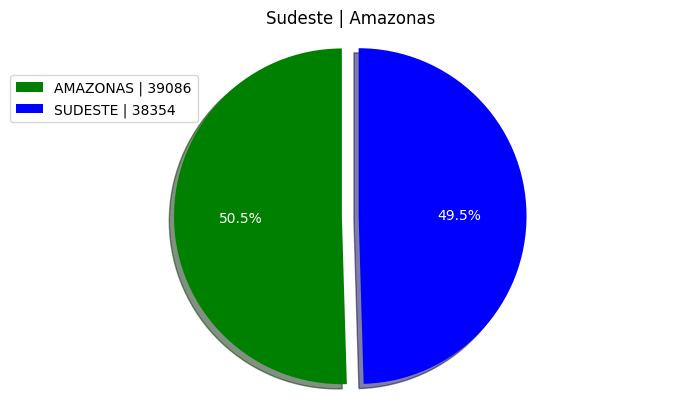

In [65]:
# Dados AMAZONAS
total_am = len(df[df['Estado'] == 'AMAZONAS'])

# Dados SUDESTE
total_sudeste = len(df[(df['Estado'] == 'RIO DE JANEIRO') | (df['Estado'] == 'ESPÍRITO SANTO') | (df['Estado'] == 'SÃO PAULO') | (df['Estado'] == 'MINAS GERAIS')])

# Montando Torta
data_sudeste_am = [total_am, total_sudeste]
def to_pie(regiao, estados):
    total = int(np.round(regiao/100.*np.sum(estados)))
    return f"{regiao:.1f}%"

plt.pie(
    data_sudeste_am, 
    labels=[f"AMAZONAS | {total_am}", f"SUDESTE | {total_sudeste}"], 
    colors=['green', 'blue'], 
    autopct=lambda estado: to_pie(estado, data_sudeste_am), 
    startangle=90, 
    explode=[0, 0.1], 
    shadow=True, 
    textprops={"color": "w"}
)
plt.title("Sudeste | Amazonas")
plt.legend(
    loc='upper left', 
    bbox_to_anchor=(-0.2, -0.1, 0.5, 1)
)
plt.axis('equal')
plt.show()

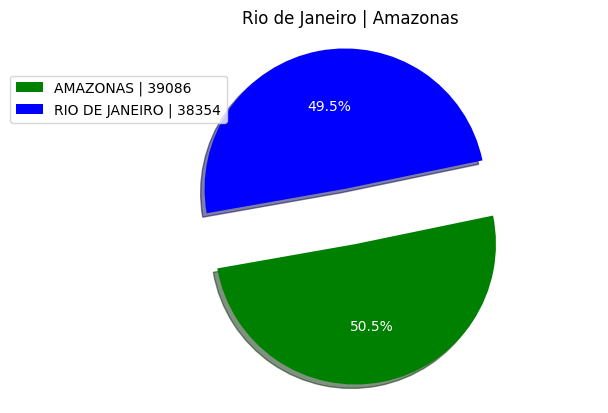

In [66]:
# total = len(df)
# male_ages = df[df['Gender'] == 'Male']["Age"]
# female_ages = df[df['Gender'] == 'Female']["Age"]

# plt.figure(figsize=(8, 6))

# # Criar histograma para homens e mulheres
# plt.hist(male_ages, bins=np.arange(male_ages.min(), male_ages.max(), 3), alpha=1, label='Male', color='blue')
# plt.hist(female_ages, bins=np.arange(female_ages.min(), female_ages.max(), 3), alpha=1, label='Female', color='pink')

# # Adicionando título e legendas
# plt.title('Distribuição de Idades por Gênero')
# plt.xlabel('Idade')
# plt.ylabel('Frequência')
# plt.legend()

# # Mostrando o gráfico
# plt.show()

# Total de focos somando os dois estados
total = len(df[(df['Estado'] == 'AMAZONAS') | (df['Estado'] == 'RIO DE JANEIRO')])

# Dados AMAZONAS
total_am = len(df[df['Estado'] == 'AMAZONAS'])
#percent_am = (len(df[df['Estado'] == 'AMAZONAS']) * 100) / total

# Dados RIO DE JANEIRO
total_sudeste = len(df[(df['Estado'] == 'RIO DE JANEIRO') | (df['Estado'] == 'ESPÍRITO SANTO') | (df['Estado'] == 'SÃO PAULO') | (df['Estado'] == 'MINAS GERAIS')])
#percent_rj = (len(df[df['Estado'] == 'RIO DE JANEIRO']) * 100) / total

# Montando Histograma
# plt.hist(male_ages, bins=np.arange(male_ages.min(), male_ages.max(), 3), alpha=1, label='Male', color='blue')
# plt.hist(female_ages, bins=np.arange(female_ages.min(), female_ages.max(), 3), alpha=1, label='Female', color='pink')
data_sudeste_am = [total_am, total_sudeste]
def to_pie(estado, estados):
    total = int(np.round(estado/100.*np.sum(estados)))
    return f"{estado:.1f}%"
    #return f"{estado:.1f}%\n{total:d}"

explode = [0, 0.4]
plt.pie(
    data_sudeste_am, 
    labels=[f"AMAZONAS | {total_am}", f"RIO DE JANEIRO | {total_sudeste}"], 
    colors=['green', 'blue'], 
    autopct=lambda estado: to_pie(estado, data_sudeste_am), 
    startangle=190, 
    explode=explode, 
    shadow=True, 
    textprops={"color": "w"}
)
plt.title("Rio de Janeiro | Amazonas")
plt.legend(
    loc='upper left', 
    bbox_to_anchor=(-0.2, -0.1, 0.5, 1)
)
plt.axis('equal')
plt.show()

Organizando os estados de maior precipitação de chuva para o menor

In [67]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import numpy as np
# plt.ion()

# df = pd.read_csv('./queimadas_dataset.csv')
# precipitation_by_municipality = df.groupby('Estado')['Precipitacao'].sum()

# precipitation_by_municipality = precipitation_by_municipality.sort_values(ascending=False)

# plt.figure(figsize=(10, 6))
# plt.scatter(precipitation_by_municipality.index, precipitation_by_municipality.values)

# plt.title('Estados com Maior Precipitação')
# plt.xlabel('Estados')
# plt.ylabel('Precipitação (mm)')
# plt.xticks(rotation=90)

# plt.tight_layout()
# plt.show()

Média de estados com maior precipitação 

In [68]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# df = pd.read_csv('./queimadas_dataset.csv')

# mean_precipitation_by_state = df.groupby('Estado')['Precipitacao'].mean()

# plt.figure(figsize=(10, 6))
# plt.hist(mean_precipitation_by_state, bins=20, label='Média de Precipitação por Estado', edgecolor='k')

# plt.vlines(mean_precipitation_by_state.mean(), 0, plt.ylim()[1], label='Média Geral', colors='r', linestyles='dashed')

# plt.xlabel('Média de Precipitação (mm)')
# plt.ylabel('Frequência')
# plt.title('Distribuição da Média de Precipitação por Estado')
# plt.legend()

# sns.despine()

# plt.tight_layout()
# plt.show()

In [69]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# df = pd.read_csv('./queimadas_dataset.csv')
# mean_precipitation_by_state = df.groupby('Estado')['Precipitacao'].mean()

# plt.figure(figsize=(10, 6))
# plt.hist(mean_precipitation_by_state, bins=20, label='Média de Precipitação por Estado', edgecolor='k')

# plt.vlines(mean_precipitation_by_state.mean(), 0, plt.ylim()[1], label='Média Geral', color='blue')

# plt.vlines(mean_precipitation_by_state.median(), 0, plt.ylim()[1], linestyles='--', label='Mediana geral', color='red')

# plt.xlabel('Média de Precipitação (mm)')
# plt.ylabel('Frequência')
# plt.title('Distribuição da Médiana de Precipitação por Estado')

# plt.legend()

# sns.despine()

# plt.tight_layout()
# plt.show()

Estados com menos dias de chuva para o com mais dias de chuva

In [70]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import numpy as np
# plt.ion()

# df = pd.read_csv('./queimadas_dataset.csv')
# precipitation_by_municipality = df.groupby('Estado')['DiaSemChuva'].sum()

# precipitation_by_municipality = precipitation_by_municipality.sort_values(ascending=False)

# plt.figure(figsize=(10, 6))
# plt.scatter(precipitation_by_municipality.index, precipitation_by_municipality.values)

# plt.title('Estados com mais dias de chuva')
# plt.xlabel('Municípios')
# plt.ylabel('Precipitação (mm)')
# plt.xticks(rotation=90)

# plt.tight_layout()
# plt.show()

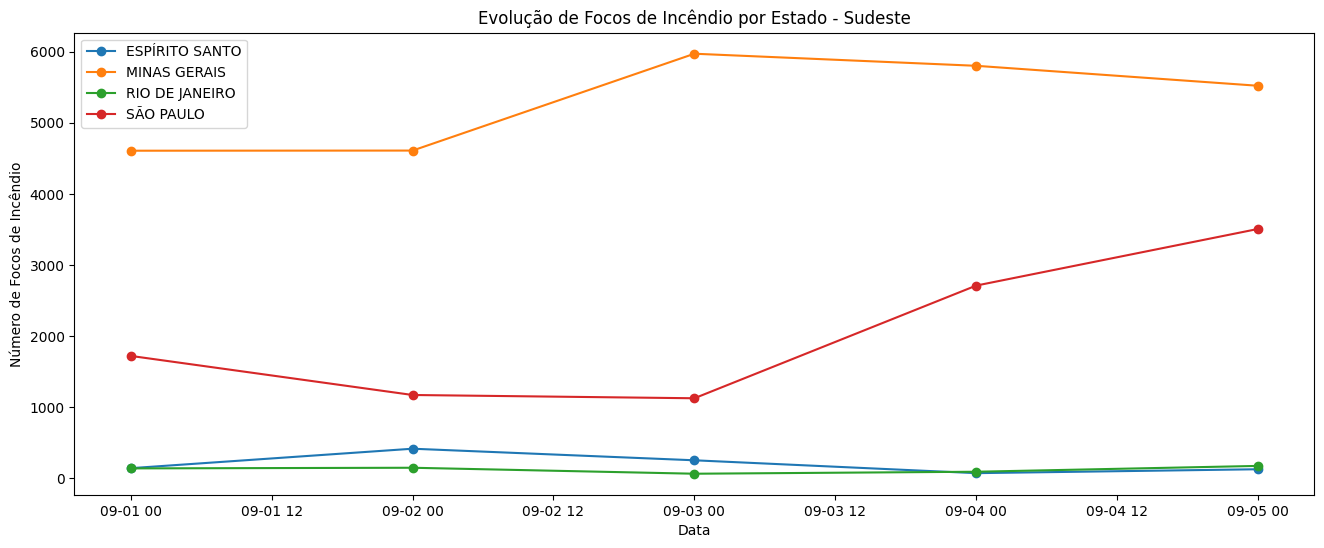

In [80]:
# max_age = df["Age"].max()
# min_age = df["Age"].min()
# print(max_age, min_age)
# fig, ax = plt.subplots()
# bins = np.arange(min_age, max_age, 1)
# print(bins)
# ax.plot(bins, female_ages, label="Female")
# ax.plot(bins, male_ages, label="Male")

# Separando as idades por gênero
# male_ages = df[df['Gender'] == 'Male']['Age'].sort_values()
# female_ages = df[df['Gender'] == 'Female']['Age'].sort_values()
# print(male_ages)

# Criando um array para o eixo x (índices das idades)
# x_male = np.arange(1, len(male_ages) + 1)
# x_female = np.arange(1, len(female_ages) + 1)

# df_male = df[(df['Gender'] == 'Male') & (df['Age'] > 70) | (df['Age'] < 40)]
# df_female = df[df['Gender'] == 'Female']
# age_count_male = df_male['Age'].value_counts().sort_index()
# age_count_female = df_male['Age'].value_counts().sort_index()

# # Criando o gráfico de linha
# plt.figure(figsize=(8, 6))

# # Plotando as linhas para homens e mulheres
# plt.plot(age_count_male.index, age_count_male.values, label='Male',linestyle='-', color='blue')
# plt.plot(age_count_female.index, age_count_female.values, label='Female',  linestyle='-',color='pink')

# # Adicionando título e legendas
# plt.title('Idade por Gênero')
# plt.xlabel('Índice')
# plt.ylabel('Idade')
# plt.legend()


# Estados com maior número de focos

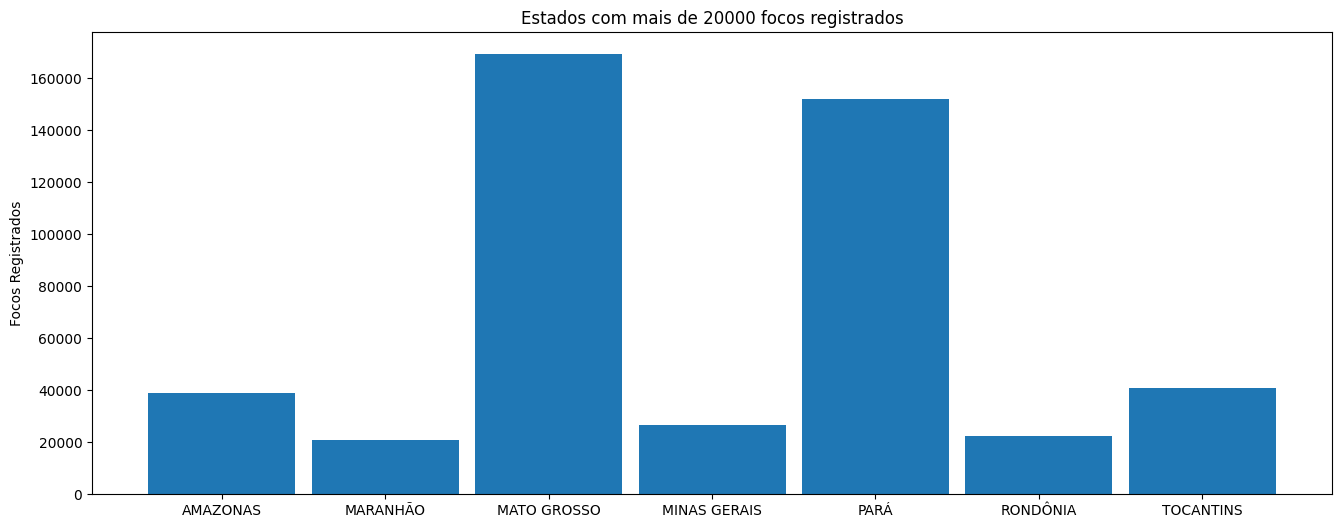

In [72]:
# Organizando um novo dataframe que tem como produto o Estado e o número de focos
total_de_focos_estado = df.groupby(['Estado']).size().reset_index(name='FocosIncendio')


# Validar número de focos (comparar com o número de linhas retornado na higienização)
# np.sum(total_de_focos_estado['FocosIncendio'])

# Obtendo apenas estados com mais de 20000 focos registrados
total_de_focos_estado = total_de_focos_estado[total_de_focos_estado['FocosIncendio'] >= 20000]

# Criando grafico de barras
fig, ax = plt.subplots(figsize=(16, 6))
ax.bar(total_de_focos_estado['Estado'], total_de_focos_estado['FocosIncendio'], width=0.9)
ax.set_ylabel('Focos Registrados')
ax.set_title('Estados com mais de 20000 focos registrados')

plt.show()

# Evolução do número de focos por dia na região Sudeste

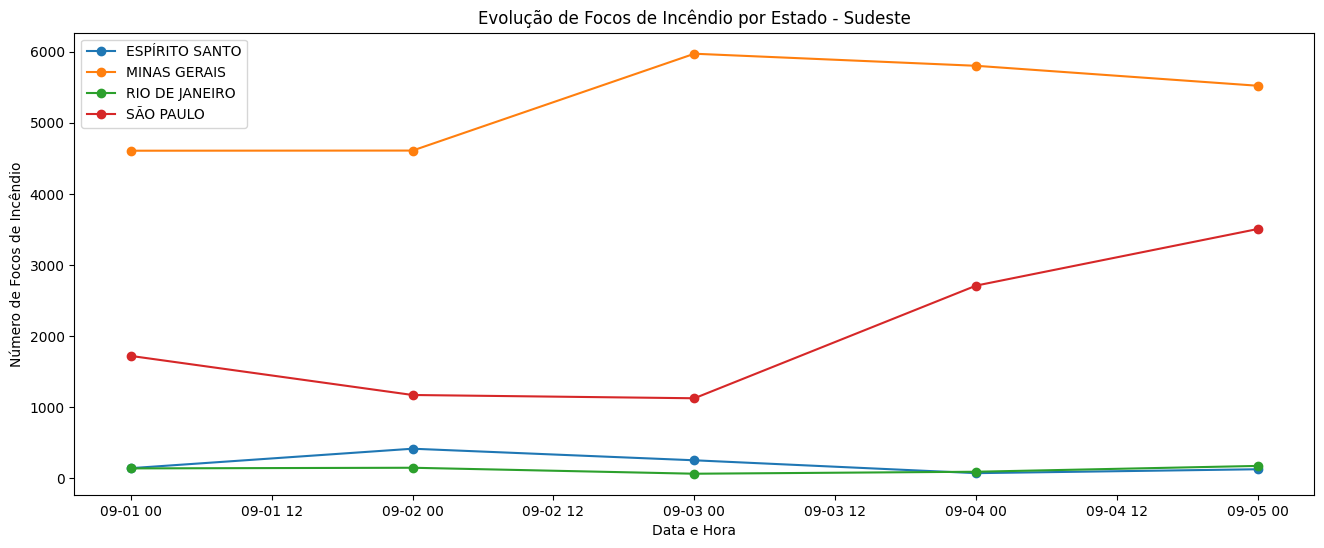

In [82]:
# Organizando um novo dataframe que tem como produto o Estado e o número de focos
sudeste = df[(df['Estado'] == 'RIO DE JANEIRO') | (df['Estado'] == 'ESPÍRITO SANTO') | (df['Estado'] == 'SÃO PAULO') | (df['Estado'] == 'MINAS GERAIS')]
sudeste
total_de_focos_sudeste = sudeste.groupby([sudeste['DataHora'].dt.date, 'Estado']).size().reset_index(name='FocosIncendio')
total_de_focos_sudeste = total_de_focos_sudeste.sort_values(by=['Estado', 'DataHora'])

fig, ax = plt.subplots(figsize=(16, 6))

# Iterar sobre os estados e plotar cada linha com configurações personalizadas
for estado in total_de_focos_sudeste['Estado'].unique():
    dados_estado = total_de_focos_sudeste[total_de_focos_sudeste['Estado'] == estado]
    ax.plot(dados_estado['DataHora'], dados_estado['FocosIncendio'], label=estado, marker='o')

# Configurar o gráfico
ax.set_xlabel('Data e Hora')
ax.set_ylabel('Número de Focos de Incêndio')
ax.set_title('Evolução de Focos de Incêndio por Estado - Sudeste')
ax.legend()

plt.show()